<a href="https://colab.research.google.com/github/DashTT/Reto-02-Chagas/blob/main/Reto02_AndradeEscobarVillenas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Carrera de Ciencia de Datos</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático &bull; Reto 2
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Andrés Merino &bull; 2025-01
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Integrantes: Andrade Juan, Escobar David, Villenas Nathaly
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Arquitectura del Riesgo: Identificación de Perfiles de Vivienda Vulnerables al Mal de Chagas en Ecuador </font>



El mal del chagas es una enfermedad parasitaria que afecta al corazón y al estómago. Es transmitida por el patógeno Trypanosoma cruzi que llega al cuerpo humano a través de chinches u otros insectos que chupen sangre. En el Ecuador, el Ministerio de Salud Pública (2025)
menciona que existe un aumento en la cantidad de contagios del Mal del Chagas y alertó a las autoridades para implementar medidas preventivas.

La misión de este documento es utilizar modelos de aprendizaje supervisado para detectar el estatus entomológico de la enfermedad, es decir, ser capaces de predecir la presencia de la enfermedad en base al valor de las variables seleccionadas.

Buscando específicamente concretar estos objetivos:
- Encontrar factores que indiquen patrones estructurales, sanitarias y ambientales para la verificación de la presencia del estatus entomológico.
- Analizar los resultados de los distintos modelos para llegar a una conclusión objetiva
- Aportar el futuro análisis de los investigadores que puedan usar estos recursos en función de nuevas soluciones al problema del mal de Chagas.

Las técnicas que vamos a utilizar son:

- SVM (Support Vector Machine): modelo supervisado que busca la mejor frontera de separación entre clases maximizando el margen, en caso de no encontrar una separación puede utilizar transformaciones entre dimensiones para obtenerla.
- Red Neuronal: modelo compuesto por capas de neuronas que aprende patrones complejos mediante ajustes iterativos de pesos que desencadenan funciones de activación.
- Random Forest: conjunto de árboles de decisión entrenados sobre muestras aleatorias.

---
## <font color='264CC7'> Carga de Librerías </font>

Los paquetes necesarios son:

In [150]:
import pandas as pd  # Manejo de datos
import matplotlib.pyplot as plt  # Visualización
import numpy as np
from sklearn.model_selection import train_test_split # División de datos
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score, roc_curve, auc, roc_auc_score
 # Métrica de evaluación
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
# Paquetes necesarios (Red Neuronal)
from sklearn.utils.class_weight import compute_class_weight #balanceo de peso de variables
import tensorflow as tf
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.losses import CategoricalCrossentropy, BinaryCrossentropy
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

---
## <font color='264CC7'> Lectura de datos </font>

Primero, empezamos con la carga de los datos.

In [151]:
# Cargar datos
df = pd.read_csv("https://github.com/DashTT/Reto-01-Chagas/blob/main/Conjunto%20de%20datos%20Viviendas_Loja_2005-20251215/Viviendas_Loja_2005.csv?raw=true")
display(df.head())
print(f"Filas: {df.shape[0]} Columnas {df.shape[1]}")
print(df['Status entomologico'].unique())


,Código,Status entomologico,Estado,Localidad,Altitud,Longitud,Latitud,A2. Cuantos dormitorios tiene la vivienda,A3 Número de personas que duermen en la vivienda,A4. Duermen 3 o mas personas en algun dormitorio,...,J3 Cuántas,J4. Palma Africana,J4 Distancia de la casa (metros),J4 Cuántas,J5. Otro tipo de de palmera o palma,J5 Cuál,J5 Distancia de la casa (metros),J5 Cuántas,E10 Cuántos,Unnamed: 138
0,AB007,Negativa,Examinada,Algarrobillo,0.0,NaN,NaN,1.0,5.0,-1.0,...,0.0,2.0,0.0,0.0,2.0,NaN,0.0,0.0,2.0,NaN
1,AB207,Negativa,Examinada,Algarrobillo,0.0,NaN,NaN,1.0,1.0,-1.0,...,0.0,2.0,0.0,0.0,2.0,NaN,0.0,0.0,0.0,NaN
2,AB208,Negativa,Examinada,Algarrobillo,0.0,NaN,NaN,1.0,5.0,-1.0,...,0.0,2.0,0.0,0.0,2.0,NaN,0.0,0.0,0.0,NaN
3,AB209,Negativa,Examinada,Algarrobillo,0.0,NaN,NaN,1.0,3.0,-1.0,...,0.0,2.0,0.0,0.0,2.0,NaN,0.0,0.0,0.0,NaN
4,AB210,Negativa,Examinada,Algarrobillo,0.0,NaN,NaN,2.0,10.0,-1.0,...,0.0,2.0,0.0,0.0,2.0,NaN,0.0,0.0,0.0,NaN


Filas: 1000 Columnas 139
['Negativa' 'Positiva']


---
## <font color='264CC7'> Selección  y preparación de variables </font>


Ahora, el proceso de selección tomó varias cosas a consideración. Estas consideraciones fueron:
* Animales que pueden portar las chinches de familia Triatominae.
* Lugares idóneos donde habitan estas chinches.
* Materiales de acumulación de temperatura ideal para su forma de vida.
* Condiciones climáticas que favorecen su aparición (humedad, luminicidad, entre otros).

Explicación de las variables seleccionadas

Todas estas variables seleccionadas son variables binarias, es decir, pueden únicamente tener un valor positivo (1) y negativo (0). A continuación, se las describirá cada una por su caso positivo:

- Servicio Higienico: Contiene un escusado exlusivo del hogar.
- Techo hormigon: Tiene techo de hormigón.
- Techo asbestos o similares: Tiene techo de asbestos o similares.
- Techo zinc: Tiene techo de zinc.
- Techo teja: Tiene techo de teja.
- Techo palma o similares: Tiene techo de palma o similares.
- Techo otros materiales: Tiene techo de otros materiales diferentes mencionados previamente.
- ParExt HormigonBloqueLadrillo: La pared externa es de bloques de ladrillos.
- ParExt Adobe Tapia: La pared externa es de Adobe.
- ParExt Madera: La pared externa es de madera.
- ParExt GuaRevPapel: La pared externa es de caña guadua revestida con papel.
- ParExt GuadRev o RellBarro: La pared externa es de caña guadua revestida o rellena con barro.
- ParExt GuadNoRev: La pared externa es de caña guadua sin revestimiento.
- Piso entablado rustico: El piso es de entablado rústico.
- Piso parquet: El piso es de parquet.
- Piso baldosa: El piso es de baldosa.
- Piso ladrillo o cemento: El piso es de ladrillo o cemento.
- Piso caña guadua: El piso es de caña guadua.
- Piso tierra: El piso es de tierra.
- Piso otros: El piso es de otros materiales no especificados.
- Gallinas: Hay presencia de gallinas en un radio menor a cinco metros.
- Cuyera: Hay presencia de cuyes en un radio menor a cinco metros.
- CorralChivosOvejas: Hay presencia de ovejas o chivos en un radio menor a cinco metros.
- Ratones: Avistamiento frecuente de ratones durante los últimos seis meses.
- Ratas: Avistamiento frecuente de ratas durante los últimos seis meses.
- Hojas Palma Coco: Existe acumulación de hojas palma de Coco alrededor de la vivienda.
- Hojas de palma cade o tagua: Existe acumulación de hojas de palma de Cade o Tagua alrededor de la vivienda.
- Hojas de otro tipo de palmera o palma: Existen hojas de otros tipos de palmera o palma.
- Desperdicios de cosecha: Existe acumulación de desperdicios de la cosecha.
- Productos agrícolas de cosecha: Existe acumulación de productos agrícolas de la cosecha.
- Piñuelas: Presencia de Piñuelas alrededor a la vivienda.
- Arbustos: Presencia de Arbustos alrededor a la vivienda.
- Arboles frutales: Presencia de Arbustos frutales a la vivienda.
- Maleza o monte: Presencia de maleza o monte alrededor a la vivienda.
- Palma coco: Presencia de palma de coco alrededor de 30 metros de la vivienda.
- Palma cade o tagua: Presencia de palma de Cade o Tagua alrededor de 30 metros de la vivienda.
- Palma africana: Presencia de palma de coco alrededor de 30 metros de la vivienda.
- Otro tipo de de palmera o palma: Presencia de otros tipos de palmera o palma no mencionados antes alrededor de 30 metros de la vivienda.

Renombrar variables verdadero o falso

In [152]:
# Renombrar columnas booleanas (VERDADERO / FALSO)
rename_bool_cols = {
    "A5 Escusado de uso exclusivo del hogar": "Servicio Higienico",
    "B1 Losa de hormigón": "Techo hormigon",
    "B1 Asbestos o similares": "Techo asbestos o similares",
    "B1 Zinc": "Techo zinc",
    "B1 Teja": "Techo teja",
    "B1 Paja palma o similares": "Techo palma o similares",
    "B1 Otros materiales": "Techo otros materiales",
    "B2 Hormigón ladrillo o bloque": "ParExt HormigonBloqueLadrillo",
    "B2 Adobe o tapia": "ParExt AdobeTapia",
    "B2 Madera": "ParExt Madera",
    "B2 Caña guadua revestida con papel": "ParExt GuaRevPapel",
    "B2 Caña guadua revestida o rellena de barro": "ParExt GuadRev o RellBarro",
    "B2 Caña guadua no revestida": "ParExt GuadNoRev",
    "B3 Entablado rústico": "Piso entablado rustico",
    "B3 Parquet": "Piso parquet",
    "B3 Baldosa o vinyl": "Piso baldosa",
    "B3 Ladrillo o cemento": "Piso ladrillo o cemento",
    "B3 Caña guadua": "Piso caña guadua",
    "B3 Tierra": "Piso tierra",
    "B3 Otros materiales": "Piso otros",
}

cols_interes = [entry for entry in rename_bool_cols.values()]
df = df.rename(columns=rename_bool_cols)

map_bool = {"VERDADERO": 1, "FALSO": 0}

df[cols_interes] = df[cols_interes].replace(map_bool)



/tmp/ipython-input-4034516437.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[cols_interes] = df[cols_interes].replace(map_bool)


Recodificar las variables binarias E2, E6, E9, F1, F2

In [153]:
df["Gallinas"] = np.where(df["E2. Donde"].isin([1, 2, 3]), 1, 0).astype(int)

# Cuyera: 1,2,3 = 1  /  0,4,5,6 = 0
df["Cuyera"] = np.where(df["E6. Donde"].isin([1, 2, 3]), 1, 0).astype(int)

# Corral chivos/ovejas: 1,2,3 = 1  /  4,5,0 = 0
df["CorralChivosOvejas"] = np.where(df["E9. Donde"].isin([1, 2, 3]), 1, 0).astype(int)

# Ratones: 1,2 = 0 (nunca / rara vez), 3,4 = 1 (frecuente / todo el tiempo)
df["Ratones"] = np.where(df["F1. Ratones"].isin([3, 4]), 1, 0).astype(int)

# Ratas: igual criterio que Ratones
df["Ratas"] = np.where(df["F2. Ratas"].isin([3, 4]), 1, 0).astype(int)

cols_interes.extend(["Gallinas", "Cuyera", "CorralChivosOvejas", "Ratones", "Ratas"])

Recodificar las variables tránsfugas

In [154]:
def recode_1_else_0(series):
    return np.where(series == 1, 1, 0).astype(int)
# H: material vegetal acumulado
df["Hojas Palma Coco"] = recode_1_else_0(df["H1. Hojas de Palma de coco"])
df["Hojas de palma cade o tagua"] = recode_1_else_0(df["H2. Hojas de Palma de Cade o tagua"])
df["Hojas de otro tipo de palmera o palma"] = recode_1_else_0(df["H3. Hojas de Palmera (Otro Tipo)"])
df["Desperdicios de cosecha"] = recode_1_else_0(df["H4. Desperdicios de la cosecha"])
df["Productos agrícolas de cosecha"] = recode_1_else_0(df["H5. Productos agricolas de la cosecha"])

# I: vegetación alrededor de la vivienda
df["Piñuelas"] = recode_1_else_0(df["I1. Piñuelas"])
df["Arbustos"] = recode_1_else_0(df["I2. Arbustos"])
df["Arboles frutales"] = recode_1_else_0(df["I3. Arboles frutales"])
df["Maleza o monte"] = recode_1_else_0(df["I4. Maleza o monte"])

# J: palmas cercanas (a 30 m)
df["Palma coco"] = recode_1_else_0(df["J2. Palmas de coco"])
df["Palma cade o tagua"] = recode_1_else_0(df["J3. Palmas de cade o tagua"])
df["Palma africana"] = recode_1_else_0(df["J4. Palma Africana"])
df["Otro tipo de de palmera o palma"] = recode_1_else_0(df["J5. Otro tipo de de palmera o palma"])

cols_interes.extend([
    "Hojas Palma Coco",
    "Hojas de palma cade o tagua",
    "Hojas de otro tipo de palmera o palma",
    "Desperdicios de cosecha",
    "Productos agrícolas de cosecha",
    "Piñuelas",
    "Arbustos",
    "Arboles frutales",
    "Maleza o monte",
    "Palma coco",
    "Palma cade o tagua",
    "Palma africana",
    "Otro tipo de de palmera o palma"
])


---
## <font color='264CC7'> Limpieza de datos </font>


Selección final y limpieza para trabajo

In [155]:
#Creamos un df previo a la limpieza
df_precleaning = df[cols_interes].copy()

#Calculamos outliers
df_precleaning.isna().sum()

# 11 NA en todos, son coincidentes?

#(df_precleaning.isna().sum().nunique() == 1)
# Sí son. Considerando que 11/1000 = 1.1% y que todos esos NA coinciden en la entrada, vamos a considerarlo como despreciable
# Las variables binarias no tienen outliers así que únicamente nos enfocamos en los nulos

df_clean = df_precleaning.dropna()

y_status = df.loc[df_clean.index, "Status entomologico"]

print(len(cols_interes))


38


---
## <font color='264CC7'> Análisis exploratorio </font>


In [156]:
summary = df_clean[cols_interes].describe()
print(summary.to_string())


       Servicio Higienico  Techo hormigon  Techo asbestos o similares  Techo zinc  Techo teja  Techo palma o similares  Techo otros materiales  ParExt HormigonBloqueLadrillo  ParExt AdobeTapia  ParExt Madera  ParExt GuaRevPapel  ParExt GuadRev o RellBarro  ParExt GuadNoRev  Piso entablado rustico  Piso parquet  Piso baldosa  Piso ladrillo o cemento  Piso caña guadua  Piso tierra  Piso otros    Gallinas      Cuyera  CorralChivosOvejas     Ratones       Ratas  Hojas Palma Coco  Hojas de palma cade o tagua  Hojas de otro tipo de palmera o palma  Desperdicios de cosecha  Productos agrícolas de cosecha    Piñuelas    Arbustos  Arboles frutales  Maleza o monte  Palma coco  Palma cade o tagua  Palma africana  Otro tipo de de palmera o palma
count          989.000000      989.000000                  989.000000  989.000000  989.000000               989.000000              989.000000                     989.000000         989.000000     989.000000          989.000000                  989.000000 

In [157]:
#Creamos una df que contenga la proporción de positivos y negativos de cada una de las variables
prop_1 = df_clean[cols_interes].mean() #proporción de 1
prop_0 = 1 - prop_1 #proporción de 0
prop_df = pd.DataFrame({
    'Negativo (0)': prop_0,
    'Positivo (1)': prop_1
})

print(prop_df)

                                       Negativo (0)  Positivo (1)
Servicio Higienico                         0.687563      0.312437
Techo hormigon                             0.960566      0.039434
Techo asbestos o similares                 0.945399      0.054601
Techo zinc                                 0.875632      0.124368
Techo teja                                 0.190091      0.809909
Techo palma o similares                    0.967644      0.032356
Techo otros materiales                     0.958544      0.041456
ParExt HormigonBloqueLadrillo              0.724975      0.275025
ParExt AdobeTapia                          0.339737      0.660263
ParExt Madera                              0.959555      0.040445
ParExt GuaRevPapel                         0.992922      0.007078
ParExt GuadRev o RellBarro                 0.951466      0.048534
ParExt GuadNoRev                           0.998989      0.001011
Piso entablado rustico                     0.925177      0.074823
Piso parqu

In [158]:
# Conteo de clases
conteo = y_status.value_counts()
print(conteo)

# Proporción
proporcion = y_status.value_counts(normalize=True)
print(proporcion)


Status entomologico
Negativa    889
Positiva    100
Name: count, dtype: int64
Status entomologico
Negativa    0.898888
Positiva    0.101112
Name: proportion, dtype: float64


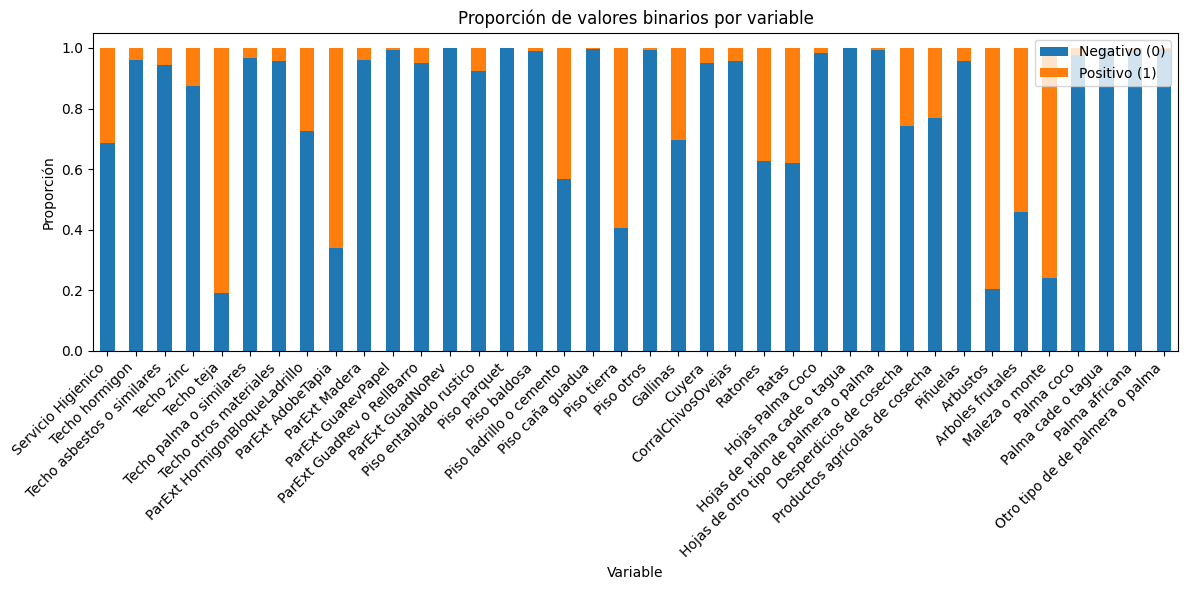

In [159]:
prop_df.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6)
)

plt.ylabel('Proporción')
plt.xlabel('Variable')
plt.title('Proporción de valores binarios por variable')
plt.legend(loc='upper right')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# <font color='264CC7'> Aplicación de modelos </font>


##**División de datos**

In [190]:
#Creamos X e y
X = df_clean
y = y_status.map({'Negativa': 0, 'Positiva': 1})

#Dividimos los datos de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11, stratify=y)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

print("Proporción global:", y.mean())
print("Proporción train:", y_train.mean())
print("Proporción test :", y_test.mean())


(791, 38)
(791,)
(198, 38)
(198,)
Proporción global: 0.10111223458038422
Proporción train: 0.1011378002528445
Proporción test : 0.10101010101010101


##**Random Forest**

**Construcción del modelo y optimización**

In [161]:
modelo_rf = RandomForestClassifier(
    random_state=42,
    n_jobs=-1,
    bootstrap=True
)

parametros = {
    "n_estimators": [300, 600],
    "max_depth": [None, 6, 10, 16],
    "min_samples_split": [2, 10, 30],
    "min_samples_leaf": [1, 3, 5, 10],
    "max_features": ["sqrt", "log2", 0.5],
    "max_samples": [0.7, 0.9, 1.0],
    "class_weight": ["balanced", {0:1, 1:5}, {0:1, 1:10}]
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=modelo_rf,
    param_grid=parametros,
    cv=skf,
    scoring="recall",
    n_jobs=-1,
    verbose=1
)


* Dado que el conjunto de datos contiene un número elevado de variables, se incorporó el hiperparámetro max_features para controlar cuántas características se consideran en cada partición, promoviendo la diversidad entre árboles y reduciendo la correlación interna del bosque.

* Se ajustaron pesos de clase para priorizar la detección de la clase positiva, dado que en el contexto del problema es más costoso no detectar un caso real que generar un falso positivo

* El espacio de hiperparámetros fue definido considerando la complejidad del modelo, el desbalance del conjunto de datos y el objetivo de maximizar la detección de casos positivos, evaluando diferentes configuraciones mediante validación cruzad

* Se exploraron distintas profundidades máximas para controlar el nivel de complejidad del modelo y evitar el sobreajuste

* min_samples_leaf se incluyó para regular la granularidad de las particiones y mejorar la generalización del modelo, especialmente en la detección de la clase positiva minoritaria

* Se realizó estratificación dado que las clases de la data estaban desbalanceadas

* Cuando no se especifica el parámetro scoring, GridSearchCV optimiza accuracy por defecto. Dado el fuerte desbalance de clases en este problema, se decidió optimizar recall para priorizar la detección de casos positivos y reducir falsos negativos

**Entrenamineto y evaluación**

In [162]:
# 5. Entrenamiento

grid.fit(X_train, y_train)

print("\nMejores hiperparámetros:")
print(grid.best_params_)

print("\nMejor recall en CV:")
print(grid.best_score_)


# 6. Evaluación final en test

best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)

print("\nAccuracy en test:")
print(accuracy_score(y_test, y_pred))

print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, digits=4))

Fitting 5 folds for each of 2592 candidates, totalling 12960 fits


KeyboardInterrupt: 

**Interpretación**

El modelo presenta un trade-off claro entre recall y precisión como consecuencia directa de la estrategia de ponderación de clases adoptada. Al asignar un peso significativamente mayor a la clase positiva, el clasificador prioriza la detección de casos con presencia del factor entomológico, reduciendo el número de falsos negativos a costa de incrementar los falsos positivos.

En este contexto, el recall de la clase positiva alcanza aproximadamente el 70%, lo que indica que el modelo identifica la mayoría de las viviendas que efectivamente presentan el factor entomológico asociado a Chagas. Sin embargo, esta capacidad de detección se acompaña de una baja precisión en la clase positiva (19%), es decir, 1 de cada 5 predicciones positivas corresponde a un caso verdaderamente positivo. Este comportamiento es esperado dada la baja prevalencia del evento y el énfasis explícito en minimizar falsos negativos.

Para la clase negativa, el modelo muestra una alta precisión (95%), lo que implica que, cuando predice ausencia del factor entomológico, dicha predicción suele ser correcta. No obstante, el recall de la clase negativa se sitúa en torno al 68%, evidenciando que el modelo tiende a clasificar una fracción relevante de viviendas negativas como positivas, reforzando su carácter conservador frente al riesgo de omitir casos verdaderamente positivos.

En conjunto, estos resultados indican que el modelo no está diseñado para proporcionar predicciones confirmatorias, sino para funcionar como una herramienta de detección temprana o tamizaje, donde la prioridad es reducir falsos negativos aun a costa de generar alertas adicionales que deberán ser evaluadas mediante procedimientos posteriores.

##**Red Neuronal**

In [163]:
# Fijamos las semillas para reproducibilidad
import random
import os
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    tf.config.experimental.enable_op_determinism()
    os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
    os.environ["TF_DETERMINISTIC_OPS"] = "1"

###Entrenamiento

In [164]:
#Definimos la red para estos datos con 3 capas ocultas y una de salida de 2 neuronas
set_seed(11)
model = Sequential([
    Input(shape=(38,)), #Son 38 variables las que se van a analizar en el modelo
    Dense(units=6, activation='relu'),
    Dense(units=3, activation='relu'),
    Dense(units=1, activation='sigmoid') #Usamos sigmoide por su distribución entre 0 y 1 perfecta para valores binarios como los que trabajamos en este dataset.
])

# Compilamos el modelo
optimizer = SGD(learning_rate=0.01)
loss = BinaryCrossentropy()
model.compile(optimizer=optimizer, loss=loss)
# Resumen del modelo
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 6)              │           234 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 3)              │            21 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 259 (1.01 KB)

 Trainable params: 259 (1.01 KB)

 Non-trainable params: 0 (0.00 B)

In [165]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7013  
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6509 
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6096 
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5739 
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5428 
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5154 
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4913 
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4700 
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4512 
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4345 
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4196 
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4065 
Epoch 13/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3949 
Epoch 14/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3846 
Epoch 15/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

###Evaluación

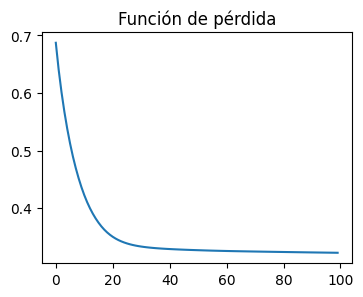

In [166]:
# Visualizar la evolución de la función de pérdida
plt.figure(figsize=(4, 3))
plt.plot(history.history['loss'])
plt.title('Función de pérdida')
plt.show()

Esta función de pérdida nos indica que a priori la pérdida bajó considerablemente pero que posteriormente fue decreciendo muy lentamente su valor. Por lo tanto podríamos decir que el modelo ya no aprende casi nada de los datos en cuanto a que no es una caída de la pérdida notoria.

In [167]:
#Evaluamos el modelo entrenado
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Loss test: {test_loss:.4f}")
#Creamos la matriz de confusión
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)
print("Matriz de confusión:")
print(cm)

#Creamos el reporte de clasificacion
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_classes))

Loss test: 0.3239
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Matriz de confusión:
[[178   0]
 [ 20   0]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       178
           1       0.00      0.00      0.00        20

    accuracy                           0.90       198
   macro avg       0.45      0.50      0.47       198
weighted avg       0.81      0.90      0.85       198



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Este intento de un modelo de red neuronal falla prediciendo los casos de 1 porque, dado que la clase 0 tiene entradas, prioriza inmediatamente el aprendizaje de la clase mayor y, como consecuencia, no castiga correctamente los errores de la clasificación en clase 1. Con esto, trataremos de optimizar este modelo agregando hiperparámetros como class_weight (castiga de acuerdo al peso de la variable), cambiar el optimizador a Adam y añadir el segmento de validación cruzada.

###Optimización

In [169]:
# Dividimos en entrenamiento, validación y prueba con stratify
# Primero: 60% entrenamiento, 40% temporal
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=11, stratify= y)
# Segundo: dividir el 40% temporal en 20% validación y 20% prueba
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=11, stratify=y_temp)
print(f"Conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Conjunto de validación: {X_val.shape[0]} muestras")
print(f"Conjunto de prueba: {X_test.shape[0]} muestras")

Conjunto de entrenamiento: 593 muestras
Conjunto de validación: 198 muestras
Conjunto de prueba: 198 muestras


In [170]:
#Realizamos un modelo distinto que contenga class_weight, un optimizador tipo adam y el proceso de validación y test
set_seed(11)
model = Sequential([
    Input(shape=(38,)),
    Dense(units=6, activation='relu'),
    Dense(units=3, activation='relu'),
    Dense(units=1, activation='sigmoid')
])
# Compilamos el modelo
optimizer = Adam(learning_rate=0.001)
loss = BinaryCrossentropy()
model.compile(
    optimizer=optimizer,
    loss=BinaryCrossentropy(),
    metrics=['Precision','Recall','AUC'])
# Resumen del modelo
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 6)              │           234 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 3)              │            21 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 259 (1.01 KB)

 Trainable params: 259 (1.01 KB)

 Non-trainable params: 0 (0.00 B)

In [171]:
#Ahora creamos el class_weight que pondremos en el history del modelo
classes = np.unique(y_train) #Sacamos los valores 0 y 1
weights = compute_class_weight(class_weight='balanced', classes=classes,y=y_train)
class_weight = dict(zip(classes, weights))
print(class_weight) #nos dirá cómo penalizará el modelo al equivocarse en cada variable

{np.int64(0): np.float64(0.5562851782363978), np.int64(1): np.float64(4.941666666666666)}


Esta parte del clas weight indica que, al equivocarse en 1, se penalizará casi 4 veces más que cuando se equivoque en un valor 0. Esto de cierta forma compensa que la proporción de 1 es mucho menor a la de 0 y además consideramos esto puede marcar la diferencia con el anterior modelo.

In [172]:
history = model.fit(X_train, y_train,epochs=200,validation_data=(X_val, y_val),class_weight=class_weight,verbose=1)

Epoch 1/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - AUC: 0.5349 - Precision: 0.1155 - Recall: 0.8067 - loss: 0.7503 - val_AUC: 0.5056 - val_Precision: 0.1064 - val_Recall: 1.0000 - val_loss: 0.7148
Epoch 2/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.5670 - Precision: 0.1174 - Recall: 0.9000 - loss: 0.7480 - val_AUC: 0.4860 - val_Precision: 0.1027 - val_Recall: 0.9500 - val_loss: 0.7109
Epoch 3/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.5687 - Precision: 0.1232 - Recall: 0.9312 - loss: 0.7477 - val_AUC: 0.4830 - val_Precision: 0.1050 - val_Recall: 0.9500 - val_loss: 0.7088
Epoch 4/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.5809 - Precision: 0.1292 - Recall: 0.8722 - loss: 0.7472 - val_AUC: 0.5006 - val_Precision: 0.0750 - val_Recall: 0.3000 - val_loss: 0.7074
Epoch 5/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.5985 - Precision: 0.2014 - Recall: 0.6100 - loss: 0.7466 - val_AUC: 0.5037 - val_Precision: 0.0811 - val_Recall: 0.3000 - val_loss: 0.7064
Epoc

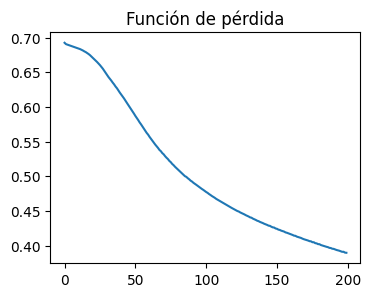

In [173]:
# Visualizar la evolución de la función de pérdida
plt.figure(figsize=(4, 3))
plt.plot(history.history['loss'])
plt.title('Función de pérdida')
plt.show()

La función de pérdida nos muestra una caída constante, lo que indicaría que efectivamente el modelo aprende y, probablemente, si aumentamos el número de epocas usadas, mejore incluso la pérdida en train y consecuentemente en test (o eso se esperaría).

In [174]:
y_prob = model.predict(X_test)
y_pred = (y_prob > 0.25).astype(int) #Usamos un threshold distinto ya que la proporción es de un 10% positivos frente a un casi 90% negativos, lo que un umbral estándar de 0.5 es inviable.

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
[[94 84]
 [ 3 17]]
              precision    recall  f1-score   support

           0       0.97      0.53      0.68       178
           1       0.17      0.85      0.28        20

    accuracy                           0.56       198
   macro avg       0.57      0.69      0.48       198
weighted avg       0.89      0.56      0.64       198



Podemos ver que, a pesar de que bajó el recall y la precisión en primera instancia, ahota ya no es 0 en los valores positivos qsino que mejoró notoriamente en estos. Con un recall de 0.85 tomando en cuenta el caso anterior es un muy buen modelo. Ahora como paso final se realizará una curva ROC de los valores de validación para determinar la eficiencia del threshold elegido y, dado que el AUC en validación no es lo más optimo (el modelo no aprende a discriminar nuevos datos) veremos si un earlystopping nos da la mejor métrica en AUC considerando los datos de validación y previniendo un posible overfitting. Finalmente, se vería el rendimiento final del modelo con el ROC de los datos de test.

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
AUC: 0.5737359550561798


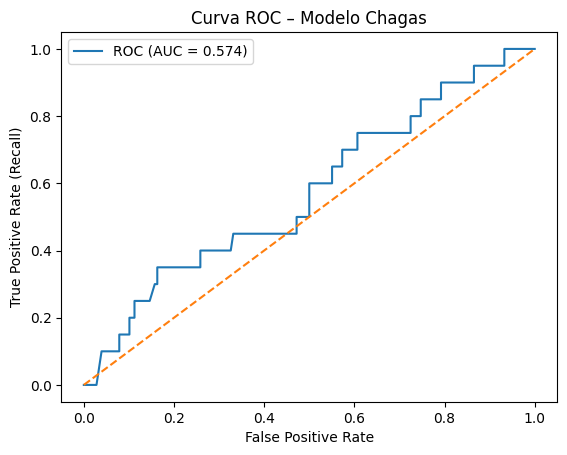

In [175]:
# Probabilidades
y_prob = model.predict(X_val).ravel()

# ROC
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
auc_score = roc_auc_score(y_val, y_prob)

print("AUC:", auc_score)

# Gráfico ROC
plt.figure()
plt.plot(fpr, tpr, label=f'ROC (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Curva ROC – Modelo Chagas")
plt.legend()
plt.show()

En la curva roc se puede apreciar que, si se desea un valor de recall por encima del 85%, tendríamos igual un false positive rate alto. Además el valor AUC de validación no es el mejor por lo que se debería considerar realizar un eralystopping. No obstante, como habíamos determinado, el discriminar los falsos negativos es más importante dado que consideramos en el caso del mal de Chagas detectar casos que si tienen el mal como si no lo tuviesen es peor a detectar casos sanos como malos; pero tampoco deseamos que todos los casos negativos sean mal clasificados. En ese sentido, al ver que el threshold elegido (en un grupo de thresholds no incluidos por descarte de su baja eficiencia) daba muy buenos resultados, entonces solo modificaremos el modelo para hacer un earlystopping que mejore o al menos retenga el mejor valor AUC de validación.

In [176]:
early_stopping = EarlyStopping(
    monitor='val_loss',      # vigilamos el valor de pérdida
    patience=20,              # Daremos unas 20 epocas de paciencia
    restore_best_weights=True
)

In [177]:
history = model.fit( #Utilizamos el earlystopping
    X_train, y_train,
    epochs=200,
    validation_data=(X_val, y_val),
    class_weight=class_weight,
    callbacks=[early_stopping],
    verbose=1)

Epoch 1/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - AUC: 0.9167 - Precision: 0.4141 - Recall: 0.9130 - loss: 0.4073 - val_AUC: 0.5751 - val_Precision: 0.1714 - val_Recall: 0.3000 - val_loss: 0.5594
Epoch 2/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.9173 - Precision: 0.4173 - Recall: 0.9130 - loss: 0.4063 - val_AUC: 0.5763 - val_Precision: 0.1622 - val_Recall: 0.3000 - val_loss: 0.5585
Epoch 3/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.9171 - Precision: 0.4173 - Recall: 0.9130 - loss: 0.4061 - val_AUC: 0.5781 - val_Precision: 0.1622 - val_Recall: 0.3000 - val_loss: 0.5612
Epoch 4/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.9174 - Precision: 0.4173 - Recall: 0.9130 - loss: 0.4052 - val_AUC: 0.5742 - val_Precision: 0.1622 - val_Recall: 0.3000 - val_loss: 0.5591
Epoch 5/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.9172 - Precision: 0.4173 - Recall: 0.9130 - loss: 0.4049 - val_AUC: 0.5794 - val_Precision: 0.1892 - val_Recall: 0.3500 - val_loss: 0.5584
Epoch

In [178]:
y_prob = model.predict(X_test)
y_pred = (y_prob > 0.25).astype(int)
#Comprobamos las métricas
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
[[94 84]
 [ 3 17]]
              precision    recall  f1-score   support

           0       0.97      0.53      0.68       178
           1       0.17      0.85      0.28        20

    accuracy                           0.56       198
   macro avg       0.57      0.69      0.48       198
weighted avg       0.89      0.56      0.64       198



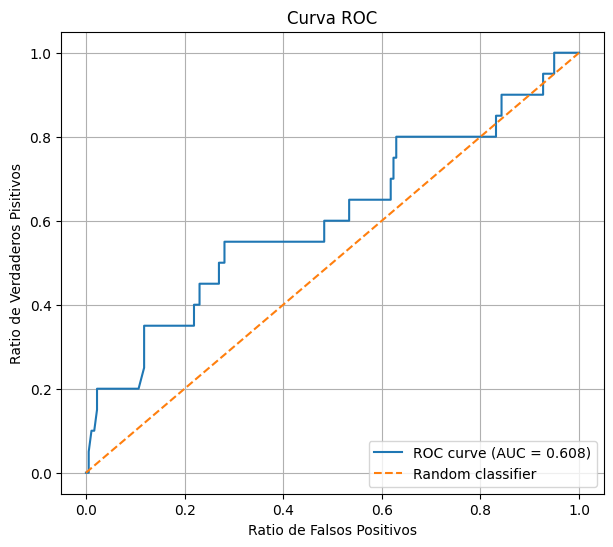

In [179]:
#Curva ROC
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random classifier')

plt.xlabel('Ratio de Falsos Positivos')
plt.ylabel('Ratio de Verdaderos Pisitivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Las interpretaciones que se pueden llegar hasta este punto son:
* A pesar del early stopping, no hay mejoras en los valores de recall y precision manejados por lo que diríamos que el modelo únicamente llega a su mejor punto en la época 5 y después la pérdida de los valores de validación baja.
* La curva ROC nos muestra que la gráfica se mantiene normalmente por encima de la línea aleatoria, lo que indicaría que en sí es un modelo que no es fuerte pero es bueno (el AUC está por encima de la media).
* En el intervalo 0.1-0.25 aproximadamente se ve mejoría con respecto a la aleatoriedad, demostrando que con un threshold bajo (en este caso usamos un threshold = 0.25) se capturan más verdaderos positivos con un trade de falsos positivos decente.
* Vemos que el recall de la clase positiva es de $0.85$, lo que significa que, aunque se esperaría mejorar el recall, es un valor muy bueno para los modelos que hemos llegado a probar hasta ahora y por tanto un modelo que podría usarse.

* Se equivoca poco en falsos negativos, lo cual es lo esperado y necesario en este modelo.

Con estas mejoras al modelo y, habiendo probado un modelo con regularizador L1 que no mejoró estas métricas, decimos que este es el mejor modelo que pudimos sacar de red neuronal con los datos obtenidos.

##**Support Vector Machine**

##Entrenamiento y evaluación

In [195]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()

modelo = SVC(kernel='linear', C=1.0)
modelo.fit(X_train, y_train)

SVC(kernel='linear')

In [196]:
# Realizar predicciones y evaluar el modelo
y_pred = modelo.predict(X_test)

# Precisión del modelo con dos decimales
accuracy = round(accuracy_score(y_test, y_pred), 2)
print("Precisión del modelo:", accuracy)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)

# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))


Precisión del modelo: 0.89
Matriz de confusión:
[[177   1]
 [ 20   0]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       178
           1       0.00      0.00      0.00        20

    accuracy                           0.89       198
   macro avg       0.45      0.50      0.47       198
weighted avg       0.81      0.89      0.85       198



Dado el caso que buscamos predecir si un hogar está infectado por la enfermedad, tenemos que priorizar el recall, ya que es más importante acertar a todos los positivos, lo que sacrificamos es que van a aparecer más falsos positivos, sin embargo, considerando el objetivo es un costo a pagar. Adicionalmente, notemos que el modelo aprende que lo más seguro es predecir que ningún hogar está infectado, para corregir esto vamos a aplicar el uso del parámetro de clases en el modelo.

In [197]:
# Realizar predicciones y evaluar el modelo

modelo = SVC(kernel='linear', C=1.0, class_weight='balanced')
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

# Precisión del modelo con dos decimales
accuracy = round(accuracy_score(y_test, y_pred), 2)
print("Precisión del modelo:", accuracy)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)

# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))


Precisión del modelo: 0.57
Matriz de confusión:
[[97 81]
 [ 4 16]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.96      0.54      0.70       178
           1       0.16      0.80      0.27        20

    accuracy                           0.57       198
   macro avg       0.56      0.67      0.48       198
weighted avg       0.88      0.57      0.65       198



Aquí el recall mejora significativemente, sin embargo, el que haya mejorado no significa que sea el mejor modelo de svm. Probemos con varios kernel para determinar cuál es el óptimo

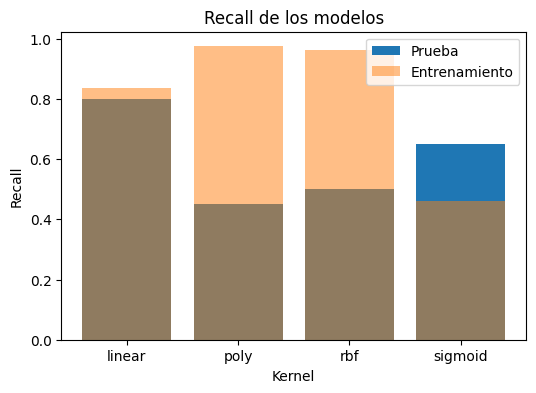

In [198]:


kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']

recall_test = []
recall_train = []

for kernel in kernel_values:
    modelo = SVC(kernel=kernel, class_weight='balanced', C=1.0)
    modelo.fit(X_train, y_train)

    y_pred_test = modelo.predict(X_test)
    y_pred_train = modelo.predict(X_train)

    recall_test.append(
        recall_score(y_test, y_pred_test, pos_label=1)
    )
    recall_train.append(
        recall_score(y_train, y_pred_train, pos_label=1)
    )

# Visualizar el recall
plt.figure(figsize=(6, 4))
plt.bar(kernel_values, recall_test)
plt.bar(kernel_values, recall_train, alpha=0.5)
plt.title('Recall de los modelos')
plt.xlabel('Kernel')
plt.ylabel('Recall')
plt.legend(['Prueba', 'Entrenamiento'])
plt.show()

Basándonos en el gráfico y considerando que buscamos el modelo con mayor recall, la mejor opción es el kernel lineal, tiene un recall alto y es estable en entrenamiento como en pruebas. No se encuentra overfitting como poly o rbf.

##Optimización

Nuestro modelo por lo pronto, es SVM con priorización de las clases y kernel lineal

In [193]:
modelo = SVC(kernel='linear', C=1.0, class_weight='balanced')
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

# Precisión del modelo con dos decimales
accuracy = round(accuracy_score(y_test, y_pred), 2)
print("Precisión del modelo:", accuracy)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)

# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))


Precisión del modelo: 0.57
Matriz de confusión:
[[97 81]
 [ 4 16]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.96      0.54      0.70       178
           1       0.16      0.80      0.27        20

    accuracy                           0.57       198
   macro avg       0.56      0.67      0.48       198
weighted avg       0.88      0.57      0.65       198



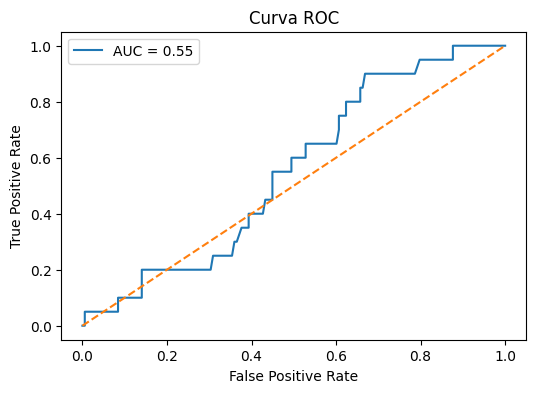

In [199]:
y_scores = modelo.decision_function(X_test)

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Gráfico
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend()
plt.show()

Pese a nuestra selección inicial, el modelo no tiene un verdadero poder predictivo. Sin embargo, vamos a utilizar gridsearch para encontrar los hiperparámetros óptimos priorizando recall.


In [204]:

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC())
])

param_grid = {
    "svc__kernel": ["rbf"],
    "svc__C": [0.1, 1, 10, 100],
    "svc__gamma": ["scale", "auto"],
    "svc__class_weight": [
        "balanced",
        {0: 1, 1: 5},
        {0: 1, 1: 10},
        {0: 1, 1: 15}
    ]
}

grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring="recall",   # importante para clase Positiva
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)

print("Mejores hiperparámetros encontrados:")
print(grid.best_params_)


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Mejores hiperparámetros encontrados:
{'svc__C': 0.1, 'svc__class_weight': {0: 1, 1: 15}, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}


In [205]:

#Utilizamos los mejores parámetros
mejor_modelo = grid.best_estimator_

y_pred = mejor_modelo.predict(X_test)

accuracy = round(accuracy_score(y_test, y_pred), 2)
print("Precisión del modelo:", accuracy)

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.43
Matriz de confusión:
[[ 70 108]
 [  4  16]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.95      0.39      0.56       178
           1       0.13      0.80      0.22        20

    accuracy                           0.43       198
   macro avg       0.54      0.60      0.39       198
weighted avg       0.86      0.43      0.52       198



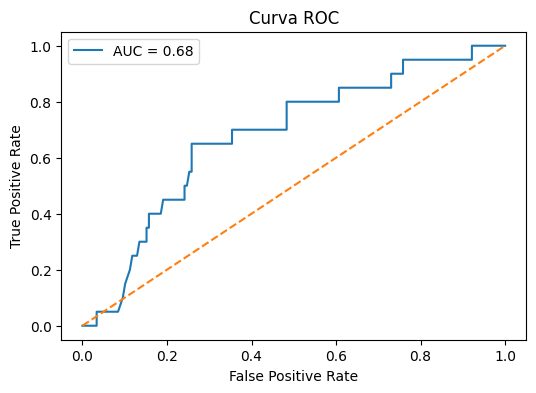

In [206]:
y_scores = mejor_modelo.decision_function(X_test)

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Gráfico
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend()
plt.show()

Notemos que el mejor modelo cambia el kernel a rbf, esto es factible ya que con la combinación específica de hiper parámetros que grid search ofrece, rbf tiene un mejor desempeño. Adicionalmente, podemos concluir respecto a este modelo:
- La priorización de recall es útil si es que el objetivo es minimizar falsos negativos. Sin embargo, sacrifica la precisión.
- Si alguna institución fuese a aplicar este modelo, tiene que estar consciente que tiene una alta cantidad de falsos positivos, lo que implica mayor costos debido a la gestión logística.
- La curva ROC nos indica que sí existe un aprendizaje pero no tiene suficiente poder discriminativo. (AUC = 0.68).
- Algo muy interesante, es que el valor óptimo para C = 0.1 lo que significa que para obtener esta priorización de recall, la penalización a los errores tiene que ser baja, de hecho, esto permite el alto radio de falsos positivos.